#Desafio Python Avançado:
#Exercitar os seguintes conceitos trabalhados no Módulo:
##✓ Scikit-Learning.
##✓ Programação concorrente.
##✓ Programação reativa.


In [ ]:
#importa as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#leitura dos dados csv e cria o dataframe
df = pd.read_csv("/content/doencas_coracao.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**Pergunta 1**: Sobre a quantidade de instâncias e de características presentes no dataset, é CORRETO afirmar: *Existem 299 instâncias e 13 características.*

**Pergunta 2**: Quantos tipos de dados diferentes existem no dataset? Considere apenas a carga utilizando o módulo pandas. *2 tipos diferentes de dados.* 

In [ ]:
# estatísticas básicas
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
cond = df['DEATH_EVENT'] == 1
df[cond].mean()

age                             65.215281
anaemia                          0.479167
creatinine_phosphokinase       670.197917
diabetes                         0.416667
ejection_fraction               33.468750
high_blood_pressure              0.406250
platelets                   256381.044792
serum_creatinine                 1.835833
serum_sodium                   135.375000
sex                              0.645833
smoking                          0.312500
time                            70.885417
DEATH_EVENT                      1.000000
dtype: float64

In [ ]:
cond = df['DEATH_EVENT'] == 1
df[cond].loc[:, 'age'].mean()

65.21528125

**Pergunta 3**: Qual era a idade (age) média dos pacientes que faleceram (DEATH_EVENT=1)? *65,21 anos.*

In [ ]:
cond1 = (df['DEATH_EVENT'] == 1) & (df['sex'] == 0)
df[cond].count()

age                         96
anaemia                     96
creatinine_phosphokinase    96
diabetes                    96
ejection_fraction           96
high_blood_pressure         96
platelets                   96
serum_creatinine            96
serum_sodium                96
sex                         96
smoking                     96
time                        96
DEATH_EVENT                 96
dtype: int64

**Pergunta 4**: Dentre os pacientes que faleceram (DEATH_EVENT=1), quantos são do sexo feminino (sex=0)? *96.*

**Para as perguntas referentes aos modelos, utilize: Scikit-Learning**

In [ ]:
#transforma os dados em array
entradas = df.iloc[:, :-1].values  #dados de entrada
saida = df.iloc[:, -1].values  #saídas ou target
#print(entradas)
#print(saida)

In [ ]:
# realiza o processo de normalização dos dados
from sklearn.preprocessing import MinMaxScaler
normaliza = MinMaxScaler() #objeto para a normalização
#entradas_normalizadas
entradas_normalizadas = normaliza.fit_transform(entradas) #realiza a normalização dos dados

In [ ]:
#realiza a divisão dos dados entre treinamento e teste
from sklearn.model_selection import train_test_split # função que realiza a divisão do dataset
# divide 30% para teste
x_train, x_test, y_train, y_test = train_test_split(entradas_normalizadas, saida, test_size=0.30, random_state=42)

**Algoritmo KNN:** clf_KNN bold text = KNeighborsClassifier(n_neighbors=5)

In [ ]:
#treina o modelo
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=5) #utiliza a construção por meio de 5 vizinhos
clf_KNN.fit(x_train, y_train) # Realiza o treinamento do classificador

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#Realiza a previsão de classificaçao
y_pred_KNN = clf_KNN.predict(x_test)

In [ ]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_KNN))
print(classification_report(y_test, y_pred_KNN))

[[51  2]
 [33  4]]
              precision    recall  f1-score   support

           0       0.61      0.96      0.74        53
           1       0.67      0.11      0.19        37

    accuracy                           0.61        90
   macro avg       0.64      0.54      0.47        90
weighted avg       0.63      0.61      0.51        90



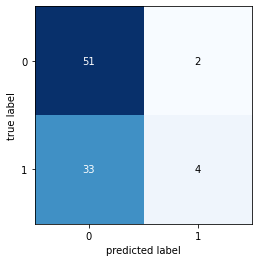

In [ ]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao_KNN = confusion_matrix(y_test, y_pred_KNN )
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao_KNN)
plt.show()

**Pergunta 5**: Após dividir as colunas do dataframe entre entrada e saída, aplicar a normalização dos dados como apresentado no enunciado (MinMaxScaler()) e dividir esses dados entre treinamento e teste, aplique o algoritmo KNN. Qual é, aproximadamente, a acurácia do modelo? *0,61.*

**Algoritmo Árvore de Decisão:** clf_arvore = DecisionTreeClassifier(random_state=1)

In [ ]:
#treina o modelo
from sklearn.tree import DecisionTreeClassifier # importa o classificador árvore de decisão
clf_arvore = DecisionTreeClassifier(random_state=1)
clf_arvore.fit(x_train,y_train) # Realiza o treinamento do classificador

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
#Realiza a previsão de classificaçao 
y_pred_arvore = clf_arvore.predict(x_test)

In [ ]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_arvore))
print(classification_report(y_test, y_pred_arvore))

[[42 11]
 [19 18]]
              precision    recall  f1-score   support

           0       0.69      0.79      0.74        53
           1       0.62      0.49      0.55        37

    accuracy                           0.67        90
   macro avg       0.65      0.64      0.64        90
weighted avg       0.66      0.67      0.66        90



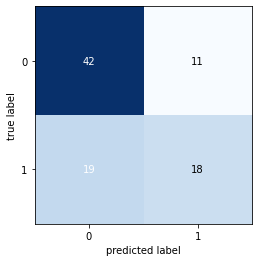

In [ ]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao_arvore = confusion_matrix(y_test, y_pred_arvore)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao_arvore)
plt.show()

**Algoritmo Rede MLP :**
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,
10), random_state=1)

In [ ]:
#treina o modelo
from sklearn.neural_network import MLPClassifier # importa o classificador Redes Neurais (MLP)
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 10), random_state=1)
clf_mlp.fit(x_train,y_train) # Realiza o treinamento do classificador

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#Realiza a previsão de classificaçao 
y_pred_mlp = clf_mlp.predict(x_test)

In [ ]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

[[51  2]
 [24 13]]
              precision    recall  f1-score   support

           0       0.68      0.96      0.80        53
           1       0.87      0.35      0.50        37

    accuracy                           0.71        90
   macro avg       0.77      0.66      0.65        90
weighted avg       0.76      0.71      0.67        90



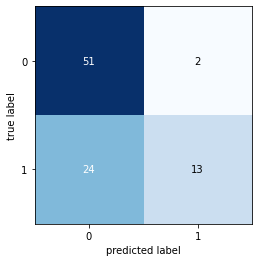

In [ ]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao_mlp = confusion_matrix(y_test, y_pred_mlp)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao_mlp)
plt.show()

**Pergunta 6**: Após dividir as colunas do dataframe entre entrada e saída, aplicar a normalização dos dados como apresentado no enunciado (MinMaxScaler()) e dividir esses dados entre treinamento e teste, aplique os algoritmos KNN, Árvore de Decisão e MLP. Qual dos algoritmos apresentou maior acurácia? *MLP.* 

# **O código abaixo deve ser utilizado para as questões de concorrência:**

In [ ]:
import threading #módulo para a construção de threads
import time #módulo para tratar tempo
#import random  #módulo para geração de números randomicos
from random import randint

In [ ]:
# Utilize a função abaixo como a “tarefa” a ser realizada pelas threads.
def contador():
  x = 10 #1000000000
  while x > 0:
    x -= 1
    print("contador {}".format(x)) 
    #time.sleep(randint(1,20)) #Para a implementação com o tempo (dormir) das threads

def contador_t1():
  x = 10 #1000000000
  while x > 0:
    x -= 1
    print("contador t1 {}".format(x)) 
    time.sleep(randint(1,20)) #Para a implementação com o tempo (dormir) das threads

def contador_t2():
  x = 10 #1000000000
  while x > 0:
    x -= 1
    print("contador t2 {}".format(x)) 
    time.sleep(randint(1,20)) #Para a implementação com o tempo (dormir) das threads

In [ ]:
#Para as chamadas sequenciais utilize o protótipo:
def imple_sequencial():
  contador()
  contador()

t0 = time.time() #armazena o tempo inicial de execução
imple_sequencial()
t1 = time.time() #tempo final após a execução
totalTime1 = t1 - t0  #diferença de tempo entre o valor inical de execução e o final
print("Tempo total de execução sequencial {}".format(totalTime1)) 

#Para as threads, utilize o protótipo:
def imple_concorrente():
  thread_1 = threading.Thread(target=contador_t1) 
  thread_2 = threading.Thread(target=contador_t2)
  thread_1.start()
  thread_2.start()   
  thread_1.join()
  thread_2.join()   

t3 = time.time() #armazena o tempo inicial de execução
imple_concorrente()
t4 = time.time() #tempo final após a execução
totalTime2 = t4 - t3  #diferença de tempo entre o valor inical de execução e o final
print("Tempo total de execução concorrente {}".format(totalTime2)) 

# para o loop de 1.000.000 de vezes
#Tempo total de execução sequencial 107.69099402427673
#Tempo total de execução concorrente 108.72845363616943
#Tempo total de execução sequencial 108.59940695762634
#Tempo total de execução concorrente 108.72381639480591
#Tempo total de execução sequencial 108.05709338188171
#Tempo total de execução concorrente 108.82221007347107

# para o loop de 100.000 de vezes
#Tempo total de execução sequencial 10.807241201400757
#Tempo total de execução concorrente 10.90002989768982
#Tempo total de execução sequencial 11.130903959274292
#Tempo total de execução concorrente 11.021122694015503
#Tempo total de execução sequencial 10.847938537597656
#Tempo total de execução concorrente 11.004305601119995

# para o loop de 10.000 de vezes
#Tempo total de execução sequencial 1.112368106842041
#Tempo total de execução concorrente 1.091392993927002
#Tempo total de execução sequencial 1.126946210861206
#Tempo total de execução concorrente 1.1058409214019775
#Tempo total de execução sequencial 1.0861835479736328
#Tempo total de execução concorrente 1.0952951908111572



contador 9
contador 8
contador 7
contador 6
contador 5
contador 4
contador 3
contador 2
contador 1
contador 0
contador 9
contador 8
contador 7
contador 6
contador 5
contador 4
contador 3
contador 2
contador 1
contador 0
Tempo total de execução sequencial 0.0005292892456054688
contador t1 9
contador t2 9
contador t2 8
contador t2 7
contador t1 8
contador t1 7
contador t1 6
contador t2 6
contador t2 5
contador t1 5
contador t2 4
contador t1 4
contador t2 3
contador t2 2
contador t1 3
contador t2 1
contador t1 2
contador t1 1
contador t2 0
contador t1 0
Tempo total de execução concorrente 117.09630179405212


**Pergunta 7**: Utilizando a função mostrada no enunciado, implemente duas chamadas sequenciais e outra chamada sendo realizada por duas threads de maneira concorrente. Sobre essas duas diferentes formas de implementação é CORRETO afirmar: *O tempo de execução através da concorrência é inferior à sequencial, pois cada thread realiza as operações através do chaveamento de contexto.* 

**Pergunta 8**: Utilizando a função mostrada no enunciado, implemente as duas chamadas sequenciais e outra chamada sendo realizada por duas threads de maneira concorrente. Adicione à chamada concorrente um tempo randômico para cada thread, como apresentado no enunciado. Após a construção dessas implementações, é CORRETO afirmar: *Após a adição desse tempo aleatório sem processamento (dormir), não é possível garantir que a implementação realizada com as duas threads seja realizada em um tempo menor.*

# **O código abaixo deve ser utilizado para as questões de programação reativa:**

In [5]:
#instalando o rx para o google colab
!pip install rx

     |████████████████████████████████| 204kB 7.7MB/s 


In [6]:
import rx
import rx.operators as ops

In [7]:

# utilize o observable recebendo o streaming de dados e a inscrição para o observer como abaixo:
# Dica: Utilize, como base, a implementação presente na primeira aula sobre programação reativa.

source = rx.from_iterable([5,4,3,2,1]) #streaming

disposable=source.pipe(
    ops.map(lambda i:i-1),
    ops.filter(lambda i:i%2==0),
  ).subscribe(
  on_next = lambda i: print("on_next: {}".format(i)),
  on_completed = lambda: print("on_completed"),
  on_error = lambda e: print("on_error: {}".format(e))) #inscrição do observer



on_next: 4
on_next: 2
on_next: 0
on_completed


**Pergunta 9**: Utilizando os códigos apresentados no enunciado deste desafio referentes às questões de programação reativa, qual das afirmativas abaixo representa uma possibilidade de transformação sobre os dados enviados pelo Observable para que o Observer receba apenas números pares? *ops.filter(lambda i:i%2==0)*

In [8]:
source = rx.from_iterable([5,4,3,2,1]) #streaming

disposable=source.pipe(
    ops.map(lambda i: i if i<3 else 0),
    ops.filter(lambda i:i>0),
  ).subscribe(
  on_next = lambda i: print("on_next: {}".format(i)),
  on_completed = lambda: print("on_completed"),
  on_error = lambda e: print("on_error: {}".format(e))) #inscrição do observer

on_next: 2
on_next: 1
on_completed


**Pergunta 10**: Utilizando os códigos presentes no enunciado deste desafio referentes às questões de programação reativa, se adicionarmos apenas as operações de map e filter abaixo, qual será o resultado? 
    ops.map(lambda i: if i<3 else 0),
    ops.filter(lambda i: i>0),
*Os valores 2 e 1 seriam exibidos no “on_next”. *

In [9]:
source = rx.from_iterable([5,4,3,"2",1]) #streaming

disposable=source.pipe(
    #ops.map(lambda i:i-1),
    ops.filter(lambda i:i%2==0),
  ).subscribe(
  on_next = lambda i: print("on_next: {}".format(i)),
  on_completed = lambda: print("on_completed"),
  on_error = lambda e: print("on_error: {}".format(e))) #inscrição do observer

on_next: 4
on_error: not all arguments converted during string formatting


**Pergunta 11**: Utilizando os códigos presentes no enunciado deste desafio referentes às questões de programação reativa, substitua a lista [5,4,3,2,1] pela lista [5,4,3,”2”,1]. Adicione apenas a operação de filtro 
ops.filter(lambda i:i%2==0),
Qual será a saída apresentada após essas mudanças? *Será apresentado no “on_next” o segundo número da lista e um “on_erro”.*